# Making Meteorological Maps Usinf Cartopy library

The aim of this project is to create for plotting maps and temporal variability plots using 4 Dimensional fields produces by a meteorological forecast system. There will be three different plots these are for global map, regional map and a graph for temperature change with a specific time. 

In [1]:
import numpy as np
import xarray as xr
from cartopy.mpl.gridliner import LatitudeFormatter, LongitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import geocat.datafiles as gdf
from geocat.viz import util as gvutil


Updating file 'registry.txt' from 'https://github.com/NCAR/GeoCAT-datafiles/raw/main/registry.txt' to 'C:\Users\Asus\AppData\Local\geocat\geocat\Cache'.


In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import xarray as xr
import numpy as np
from scipy.interpolate import LinearNDInterpolator
%matplotlib notebook

In [3]:
ds = xr.open_dataset("gv-2016042418.nc", decode_times=False)

In [5]:
ds

<xarray.Dataset>
Dimensions:                    (y: 256, x: 289, time: 25, z: 5)
Coordinates:
    lon                        (y, x) float32 ...
    lat                        (y, x) float32 ...
  * time                       (time) float32 0.0 1.0 2.0 3.0 ... 22.0 23.0 24.0
    level                      (z) float32 ...
Dimensions without coordinates: y, x, z
Data variables:
    PTOP                       float32 ...
    LatLonLevCoordinateSystem  |S1 ...
    WDIR                       (time, z, y, x) float32 ...
    WSPD                       (time, z, y, x) float32 ...
    T                          (time, z, y, x) float32 ...
    ZG                         (time, z, y, x) float32 ...
    HUS                        (time, z, y, x) float32 ...
    PS                         (time, y, x) float32 ...
    PN                         (time, y, x) float32 ...
Attributes:
    source:       GEM-LAM 3.2.2
    title:        Numerical weather forecast
    label:        JS-DEP-ON
    Conventions:  CF-1.6

- info
- Dimensions: x and y used for create latitude and longitude data, time stamp 25, z value for pressure levels which is 5.
- Coordinates: time, longitude, latitude and pressure levels(z = 300 500 700 850 and 1000 hPa)
- Data Variables: 
        - PTOP: Pressure at model top "hPa"
        - LatLonLevCoordinateSystem: latitude and longitude "degree"
        - WDIR: Wind Direction "degree"
        - WSPD: Wind Speed "m/s"
        - T : Temperature "K"
        - ZG: Geopotantial Height "dam"
        - HUS: Specific Humidity "1"
        - PS: Surface Pressure "hPa" 
        - PN: Sea Level Pressure "hPa"
- Global attributes
        - source = "GEM-LAM 3.2.2";
        - title = "Numerical weather forecast";
        - label = "JS-DEP-ON";
        - Conventions = "CF-1.6";

In [6]:
temp=ds.T[12,:,:] #temperature for 12th day witl all pressure levels
temp

<xarray.DataArray 'T' (z: 5, y: 256, x: 289)>
[369920 values with dtype=float32]
Coordinates:
    lon      (y, x) float32 19.0 18.83 18.66 18.49 ... 198.5 198.7 198.8 199.0
    lat      (y, x) float32 -39.88 -39.88 -39.86 -39.84 ... 36.14 36.12 36.12
    time     float32 12.0
    level    (z) float32 300.0 500.0 700.0 850.0 1e+03
Dimensions without coordinates: z, y, x
Attributes:
    long_name:  temperature
    units:      K

In [8]:
temp1=temp[2,:,:] # temperature for 12th day and 700 hPa Pressure level
temp1 # checking data

<xarray.DataArray 'T' (y: 256, x: 289)>
array([[263.1534 , 262.90927, 262.5538 , ..., 263.087  , 263.3878 , 263.1534 ],
       [259.78427, 259.37997, 259.12802, ..., 260.3624 , 259.9503 , 259.78427],
       [256.6534 , 256.0284 , 255.69247, ..., 257.40536, 257.07333, 256.6534 ],
       ...,
       [280.28818, 280.09677, 279.78232, ..., 280.212  , 280.30185, 280.28818],
       [275.63974, 275.5284 , 275.38974, ..., 274.76865, 275.6495 , 275.63974],
       [272.97958, 273.087  , 273.1866 , ..., 272.86826, 272.8995 , 272.97958]],
      dtype=float32)
Coordinates:
    lon      (y, x) float32 19.0 18.83 18.66 18.49 ... 198.5 198.7 198.8 199.0
    lat      (y, x) float32 -39.88 -39.88 -39.86 -39.84 ... 36.14 36.12 36.12
    time     float32 12.0
    level    float32 700.0
Dimensions without coordinates: y, x
Attributes:
    long_name:  temperature
    units:      K

In [11]:
tmp.max()

287.94833

In [12]:
lon = ds['lon'].values
type(lon)  # Checking the type

numpy.ndarray

In [13]:
lon.shape # Checking the shape

(256, 289)

In [14]:
# Flattening the parameters
lon = ds['lon'].values.flatten()
lat = ds['lat'].values.flatten()
tmp = temp1.values.flatten()

In [15]:
tmp.shape

(73984,)

In [16]:
XX = np.linspace(-180,180,361)
YY = np.linspace(-90,90,181)
X, Y = np.meshgrid(XX, YY) # 2D grid for interpolation

In [17]:
pairs=zip(lon, lat)
print (type(pairs))
print (pairs)

<class 'zip'>


In [18]:
l = list(pairs)
print (type(l))
print (l[0:10])

<class 'list'>
[(18.999996, -39.882805), (18.828882, -39.878094), (18.658669, -39.863995), (18.490257, -39.840572), (18.324528, -39.80796), (18.162348, -39.766323), (18.004564, -39.715878), (17.851994, -39.6569), (17.705414, -39.589687), (17.565573, -39.514595)]


In [19]:
lon = ds['lon'].values.flatten()
lon = np.where(lon<180., lon, lon-360.)
lat = ds['lat'].values.flatten()
tmp = temp1.values.flatten()
interp = LinearNDInterpolator(list(zip(lon, lat)), tmp)
Z = interp(X, Y)
print (type(Z))
print(Z[10,10])

<class 'numpy.ndarray'>
248.13159888639194


<IPython.core.display.Javascript object>


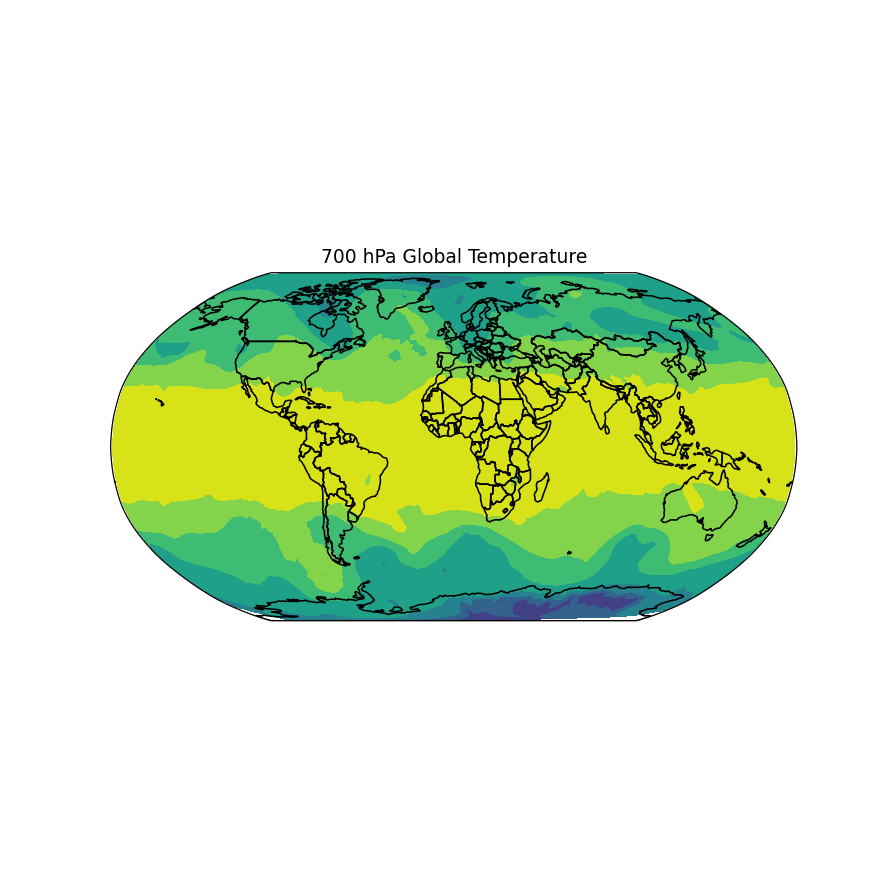

NameError: name 'fig' is not defined

In [20]:
fig6 = plt.figure("GLOBAL 700 hPa TEMPERATURE",figsize=(7,7))
ax6= fig6.add_subplot(1, 1, 1, projection=ccrs.Robinson())

s = cfeature.AdaptiveScaler('110m',(('50m', 50), ('10m', 10)))
TMP = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries',
                                    scale=s,facecolor='none')
ax6.add_feature(TMP, edgecolor='black', facecolor='none');
ax6.set_global()
ax6.contourf(X,Y,Z,transform=ccrs.PlateCarree());
ax6.set_title('700 hPa Global Temperature')
c1 = ax6.contourf(X,Y,Z,transform=ccrs.PlateCarree());
cbar1 = fig.colorbar(c1,ax=ax6, orientation='horizontal',shrink=1.2)

In [21]:
sample =(slice(60,200),slice(75,200))
s1,s2=sample
sample2d=(12,0,s1,s2) #

In [22]:
lat = ds.lat[sample]
lat

<xarray.DataArray 'lat' (y: 140, x: 125)>
array([[42.090294, 42.113045, 42.135475, ..., 42.415497, 42.397617, 42.3794  ],
       [42.22328 , 42.246082, 42.268574, ..., 42.549294, 42.531364, 42.513103],
       [42.356262, 42.379124, 42.40167 , ..., 42.683094, 42.665123, 42.646812],
       ...,
       [60.179153, 60.21308 , 60.246563, ..., 60.666435, 60.639523, 60.61212 ],
       [60.309612, 60.343666, 60.37727 , ..., 60.798687, 60.771667, 60.744156],
       [60.44005 , 60.47422 , 60.507946, ..., 60.93092 , 60.903797, 60.87619 ]],
      dtype=float32)
Coordinates:
    lon      (y, x) float32 6.563 6.74 6.917 7.095 ... 33.37 33.64 33.91 34.17
    lat      (y, x) float32 42.09 42.11 42.14 42.16 ... 60.96 60.93 60.9 60.88
Dimensions without coordinates: y, x
Attributes:
    long_name:      latitude
    units:          degrees_north
    standard_name:  latitude

In [23]:
lon = ds.lat[sample]
tmp = ds.T[sample2d]

<IPython.core.display.Javascript object>


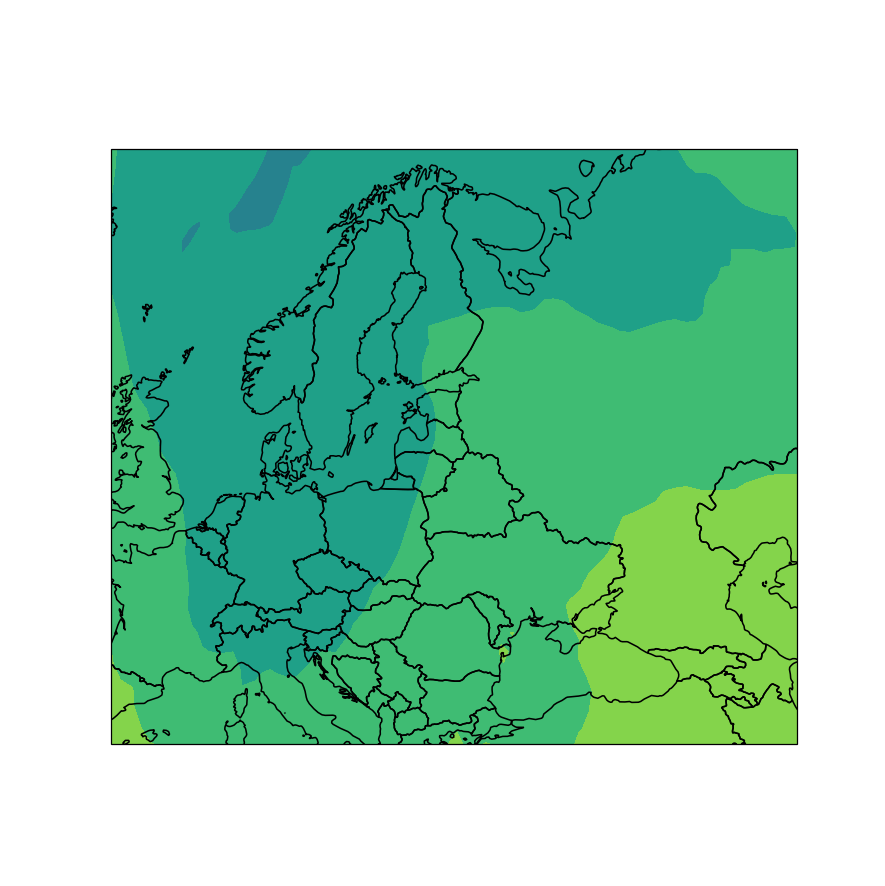

In [35]:
fig7 = plt.figure("GEM regional MSLP forecast",figsize=(7,7))
ax7= fig7.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=19,\
                                    central_latitude=52,standard_parallels=(30,60)))
ax7.set_extent([0, 50, 40, 70], crs=ccrs.PlateCarree());
s = cfeature.AdaptiveScaler('110m',(('50m', 50), ('10m', 10)))
PL = cfeature.NaturalEarthFeature(category='cultural',
                                  name='admin_0_countries',
                                  scale=s,facecolor='none')
ax7.add_feature(PL, edgecolor='black',  facecolor='none');
ax7.contourf(X,Y,Z,transform=ccrs.PlateCarree());

<IPython.core.display.Javascript object>


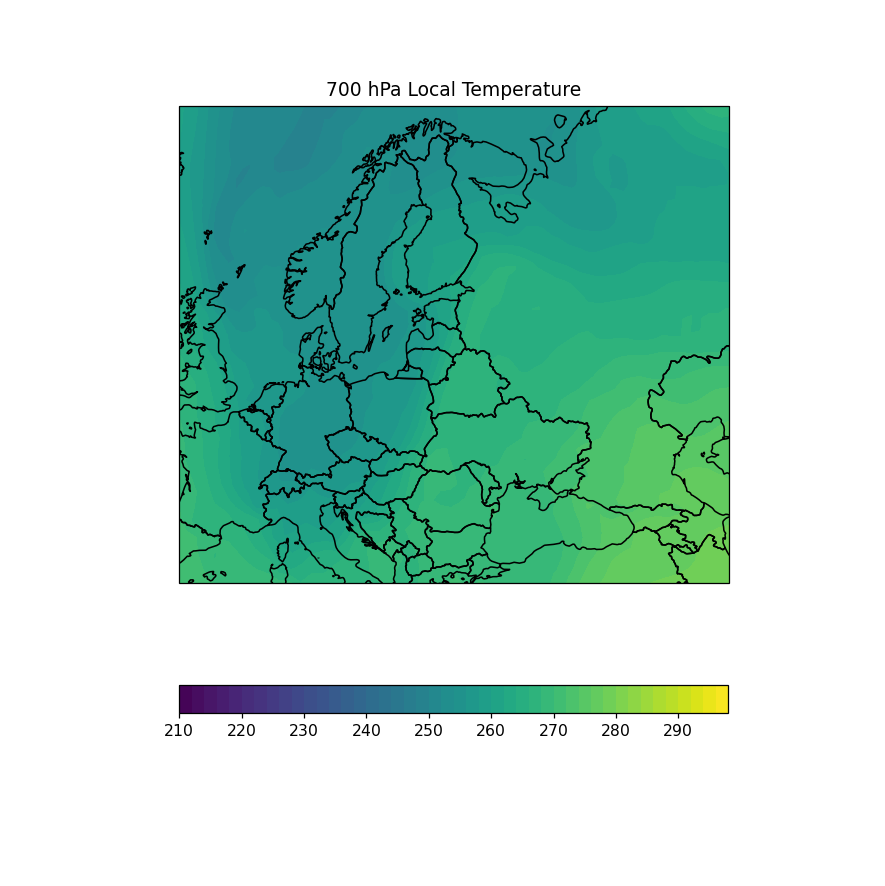

Text(0.5, 1.0, '700 hPa Local Temperature')

In [30]:
fig7 = plt.figure("Local Temperature Forecast",figsize=(7,7))
ax7= fig7.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=19,\
                                    central_latitude=52,standard_parallels=(30,60)))

ax7.set_extent([0, 50, 40, 70], crs=ccrs.PlateCarree());

s = cfeature.AdaptiveScaler('110m',(('50m', 50), ('10m', 10)))
PL = cfeature.NaturalEarthFeature(category='cultural',
                                  name='admin_0_countries',
                                  scale=s,facecolor='none')
Tmin = 210
Tmax = 300

ax7.add_feature(PL, edgecolor='black',  facecolor='none');
c2 = ax7.contourf(X,Y,Z,range(Tmin,Tmax,2),
                  transform=ccrs.PlateCarree())
cbar = fig7.colorbar(c2, ax=ax7, orientation='horizontal',shrink=0.8)
ax7.set_title('700 hPa Local Temperature')


In [31]:
temp2 = ds.T # for temperature
temperature = temp2.isel(z=2, y=120, x=153) # depends on the longitude, latitude and the z value
temperature

<xarray.DataArray 'T' (time: 25)>
array([261.9333 , 261.86353, 261.92303, 262.03864, 261.9029 , 261.70343,
       261.33496, 261.10297, 260.55005, 260.09705, 259.66467, 259.3246 ,
       259.47568, 259.60086, 259.5678 , 259.62195, 259.6372 , 259.6655 ,
       259.7406 , 259.92664, 259.84283, 259.5738 , 259.32098, 259.71674,
       259.86264], dtype=float32)
Coordinates:
    lon      float32 20.93
    lat      float32 50.97
  * time     (time) float32 0.0 1.0 2.0 3.0 4.0 5.0 ... 20.0 21.0 22.0 23.0 24.0
    level    float32 700.0
Attributes:
    long_name:  temperature
    units:      K

In [32]:
temp2

<xarray.DataArray 'T' (time: 25, z: 5, y: 256, x: 289)>
[9248000 values with dtype=float32]
Coordinates:
    lon      (y, x) float32 19.0 18.83 18.66 18.49 ... 198.5 198.7 198.8 199.0
    lat      (y, x) float32 -39.88 -39.88 -39.86 -39.84 ... 36.14 36.12 36.12
  * time     (time) float32 0.0 1.0 2.0 3.0 4.0 5.0 ... 20.0 21.0 22.0 23.0 24.0
    level    (z) float32 300.0 500.0 700.0 850.0 1e+03
Dimensions without coordinates: z, y, x
Attributes:
    long_name:  temperature
    units:      K

In [33]:
fig7 = plt.figure("GEM regional MSLP forecast",figsize=(7,7))
ax7= fig7.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=19,\
                                    central_latitude=52,standard_parallels=(30,60)))

ax7.set_extent([0, 50, 40, 70], crs=ccrs.PlateCarree());

s = cfeature.AdaptiveScaler('110m',(('50m', 50), ('10m', 10)))
PL = cfeature.NaturalEarthFeature(category='cultural',
                                  name='admin_0_countries',
                                  scale=s,facecolor='none')
Tmin = 200
Tmax = 300

ax7.add_feature(PL, edgecolor='black',  facecolor='none');
c2 = ax7.contourf(X,Y,Z,range(Tmin,Tmax,10),
                  transform=ccrs.PlateCarree())
cbar = fig7.colorbar(c2, ax=ax7, orientation='horizontal',shrink=0.8)

<IPython.core.display.Javascript object>


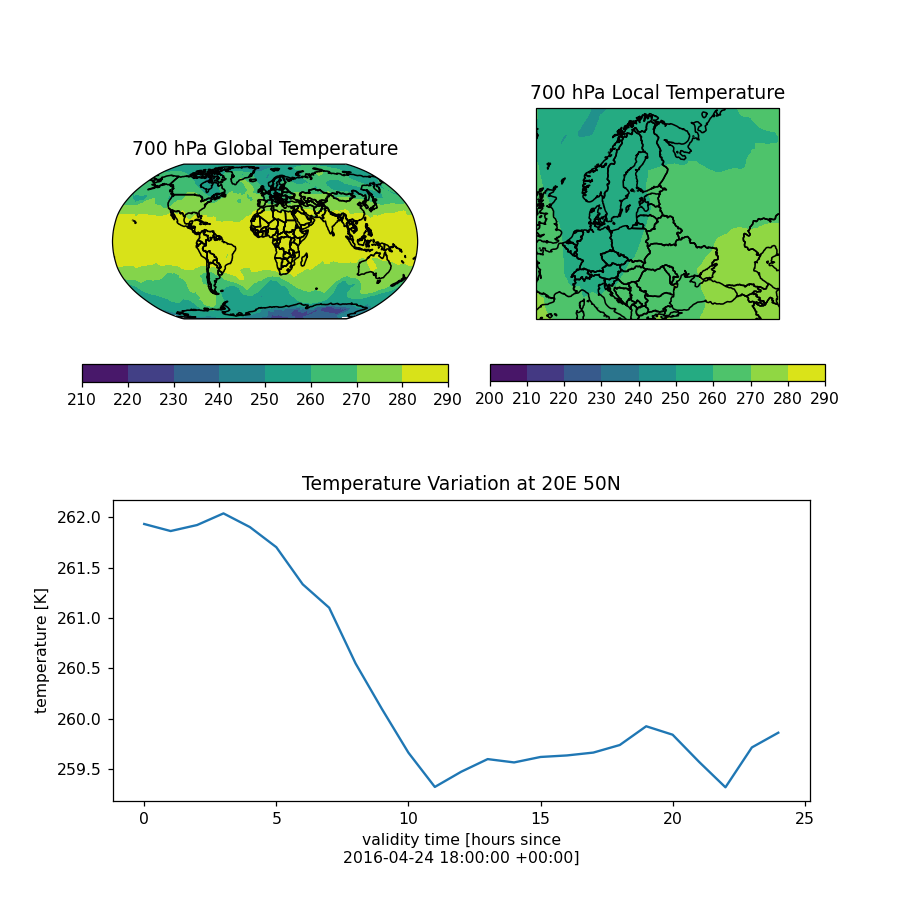

Text(0.5, 1.0, 'Temperature Variation at 20E 50N')

In [34]:
# Set up figure using a subplot grid to create top centered plot
# Having a 4x2 subplot grid and having each plot span 2 columns allows for the top
# plot to span middle two columns
fig = plt.figure("3 Subplots", figsize=(8, 8))
gs = plt.GridSpec(2, 4, figure=fig, hspace=0.3, wspace=0.8)

s = cfeature.AdaptiveScaler('110m',(('50m', 50), ('10m', 10)))
PL = cfeature.NaturalEarthFeature(category='cultural', 
                                  name='admin_0_countries',scale=s,
                                  facecolor='none')

# Arrange plots, each spanning two columns
# First Plot - Global 
ax1 = plt.subplot(gs[0, 0:2], projection=ccrs.Robinson())
ax1.add_feature(PL, edgecolor='black', facecolor='none');
ax1.set_global()
ax1.contourf(X,Y,Z,transform=ccrs.PlateCarree());
c1 = ax1.contourf(X,Y,Z,transform=ccrs.PlateCarree());
cbar1 = fig.colorbar(c1,ax=ax1, orientation='horizontal',shrink=1.2)
ax1.set_title('700 hPa Global Temperature')

# Second Plot - Local 
ax2 = plt.subplot(gs[0, 2:4], projection=ccrs.LambertConformal(central_longitude=19,\
                                    central_latitude=52,standard_parallels=(30,60)))
ax2.set_extent([0, 50, 40, 70], crs=ccrs.PlateCarree());

Tmin = 200
Tmax = 300

ax2.add_feature(PL, edgecolor='black', facecolor='none');
c2 = ax2.contourf(X,Y,Z,range(Tmin,Tmax,10),
                  transform=ccrs.PlateCarree())
cbar = fig.colorbar(c2, ax=ax2, orientation='horizontal',shrink=1.1)
ax2.set_title('700 hPa Local Temperature')




# Third Plot - Time Series 
ax3 = plt.subplot(gs[1, 0:4])
temperature.plot(ax=ax3)
ax3.set_title('Temperature Variation at 20E 50N')
